# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
#!pip uninstall numpy -y
#!pip install numpy==1.26.4 --no-binary :all:

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 92.9 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [6]:
#command to be used when the libraries are not present
#!pip install  pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0 Pillow==11.1.0 tensorflow==2.18.0 keras==3.8.0 scikit-learn==1.6.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 863.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1


In [24]:
# Import essential libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

import random

Load the dataset.

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [25]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):

    img = Image.open(image_path).convert('RGB')
    width, height = img.size
    min_dim = min(width, height)
    left = (width - min_dim) // 2
    top = (height - min_dim) // 2
    right = left + min_dim
    bottom = top + min_dim
    img = img.crop((left, top, right, bottom))
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0

    return img_array


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [26]:


def load_dataset(data_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    label_map = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = load_and_preprocess_image(img_path, target_size)
                images.append(img)
                labels.append(label_map[class_name])
            except Exception as e:
                print(f"Skipped {img_path}: {e}")

    return np.array(images), np.array(labels), class_names


In [ ]:
#Internal used for colab
#!ls -l /content/

In [4]:
#internal used for colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#used internal to colab

"""
import zipfile

zip_file = "/content/drive/MyDrive/image_assignment/data.zip"        # Replace with your actual file name
extract_to = "/content/data"          # Destination folder

# Unzip safely
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped files to:", extract_to) """

Unzipped files to: /content/data


In [28]:
data_path = "data/data"

X, y, class_names = load_dataset(data_path, target_size=(128, 128))

print("Total images loaded:", len(X))
print("Image shape:", X[0].shape)
print("Total labels loaded:", len(y))
print("Classes found:", class_names)

Total images loaded: 7625
Image shape: (128, 128, 3)
Total labels loaded: 7625
Classes found: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

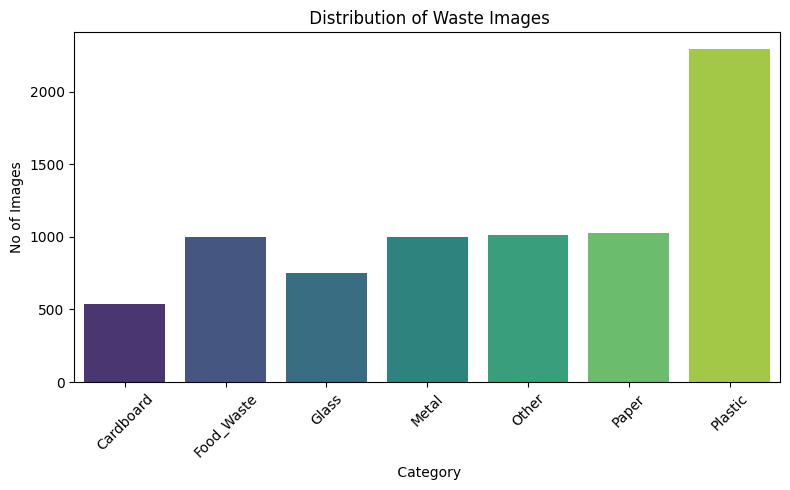

In [29]:
unique_labels, counts = np.unique(y, return_counts=True)
class_counts = {class_names[i]: count for i, count in zip(unique_labels, counts)}
classes = list(class_counts.keys())
values = list(class_counts.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=classes, y=values, hue=classes, palette="viridis", legend=False)
plt.title(" Distribution of Waste Images")
plt.xlabel(" Category")
plt.ylabel("No of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

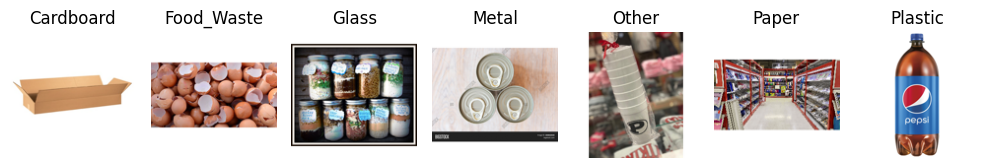

In [30]:
# Visualise Sample Images

plt.figure(figsize=(10,10))
for i, class_name in enumerate(class_names):
    indices = np.where(y == i)[0]
    random_index = random.choice(indices)
    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(X[random_index])
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [31]:
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

for class_name in class_names:
    class_dir = os.path.join(data_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                # Update min/max trackers
                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)
        except Exception as e:
            print(f"Skipped {img_path}: {e}")

print(f"Small dimensions: {min_width} x {min_height}")
print(f"Large dimensions: {max_width} x {max_height}")


Small dimensions: 256 x 256
Large dimensions: 256 x 256


# Resize the image dimensions

* since the small dimensions and the large dimensions are same there is no need for the resize of the images

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [32]:
# Encode the labels suitably , using one-hot encoded approach
y_encoded = to_categorical(y, num_classes=len(class_names))
print("Original label:", y[0])
print("One-hot encoded label:", y_encoded[0])
print("Shape of encoded labels:", y_encoded.shape)

Original label: 0
One-hot encoded label: [1. 0. 0. 0. 0. 0. 0.]
Shape of encoded labels: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [44]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [59]:

from tensorflow.keras.regularizers import l2

input_tensor = Input(shape=(128, 128, 3))

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

for layer in base_model.layers[-4:]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.001))(x)
x = Dropout(0.7)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output_layer)

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_resnet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 23,006,215 (87.76 MB)

 Non-trainable params: 1,107,840 (4.23 MB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [60]:

checkpoint_cb = ModelCheckpoint("resnet50_best.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history_resnet = model_resnet.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_716']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1923 - loss: 3.2579
Epoch 1: val_accuracy improved from -inf to 0.30098, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step - accuracy: 0.1924 - loss: 3.2564 - val_accuracy: 0.3010 - val_loss: 4.7109
Epoch 2/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3421 - loss: 2.3671
Epoch 2: val_accuracy did not improve from 0.30098
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.3424 - loss: 2.3661 - val_accuracy: 0.2997 - val_loss: 5.1338
Epoch 3/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4436 - loss: 1.9743
Epoch 3: val_accuracy improved from 0.30098 to 0.30754, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4439 - loss: 1.9737 - val_accuracy: 0.3075 - val_loss: 3.5597
Epoch 4/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5463 - loss: 1.7027
Epoch 4: val_accuracy improved from 0.30754 to 0.39541, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5464 - loss: 1.7024 - val_accuracy: 0.3954 - val_loss: 2.0797
Epoch 5/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6393 - loss: 1.4855
Epoch 5: val_accuracy improved from 0.39541 to 0.63410, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6393 - loss: 1.4857 - val_accuracy: 0.6341 - val_loss: 1.5432
Epoch 6/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6747 - loss: 1.3724
Epoch 6: val_accuracy improved from 0.63410 to 0.72918, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.6748 - loss: 1.3721 - val_accuracy: 0.7292 - val_loss: 1.2623
Epoch 7/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7202 - loss: 1.2331
Epoch 7: val_accuracy improved from 0.72918 to 0.75803, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7203 - loss: 1.2329 - val_accuracy: 0.7580 - val_loss: 1.1925
Epoch 8/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7697 - loss: 1.1209
Epoch 8: val_accuracy improved from 0.75803 to 0.77836, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7698 - loss: 1.1206 - val_accuracy: 0.7784 - val_loss: 1.1390
Epoch 9/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7995 - loss: 1.0537
Epoch 9: val_accuracy improved from 0.77836 to 0.78885, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7996 - loss: 1.0533 - val_accuracy: 0.7889 - val_loss: 1.1143
Epoch 10/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8358 - loss: 0.9477
Epoch 10: val_accuracy improved from 0.78885 to 0.79279, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8358 - loss: 0.9477 - val_accuracy: 0.7928 - val_loss: 1.0806
Epoch 11/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8544 - loss: 0.8852
Epoch 11: val_accuracy improved from 0.79279 to 0.80197, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8545 - loss: 0.8850 - val_accuracy: 0.8020 - val_loss: 1.0649
Epoch 12/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8779 - loss: 0.8196
Epoch 12: val_accuracy improved from 0.80197 to 0.80852, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8779 - loss: 0.8195 - val_accuracy: 0.8085 - val_loss: 1.0785
Epoch 13/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9029 - loss: 0.7512
Epoch 13: val_accuracy improved from 0.80852 to 0.82033, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9029 - loss: 0.7512 - val_accuracy: 0.8203 - val_loss: 1.0657
Epoch 14/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9127 - loss: 0.7125
Epoch 14: val_accuracy did not improve from 0.82033
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9127 - loss: 0.7124 - val_accuracy: 0.8170 - val_loss: 1.0750
Epoch 15/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9334 - loss: 0.6659
Epoch 15: val_accuracy improved from 0.82033 to 0.82295, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9334 - loss: 0.6659 - val_accuracy: 0.8230 - val_loss: 1.0706
Epoch 16/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9515 - loss: 0.6243
Epoch 16: val_accuracy improved from 0.82295 to 0.83082, saving model to resnet50_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9514 - loss: 0.6243 - val_accuracy: 0.8308 - val_loss: 1.0820
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 11.


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>


Evaluate the model on test dataset. Derive appropriate metrics.

In [61]:
# Evaluate on the test set; display suitable metrics

val_loss, val_accuracy = model_resnet.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7994 - loss: 1.0516
Validation Accuracy: 0.8020
Validation Loss: 1.0649


In [62]:
y_pred_probs = model_resnet.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_716']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step
              precision    recall  f1-score   support

   Cardboard       0.93      0.84      0.88       108
  Food_Waste       0.80      0.82      0.81       200
       Glass       0.77      0.75      0.76       150
       Metal       0.89      0.85      0.87       200
       Other       0.79      0.65      0.71       202
       Paper       0.69      0.78      0.73       206
     Plastic       0.81      0.85      0.83       459

    accuracy                           0.80      1525
   macro avg       0.81      0.79      0.80      1525
weighted avg       0.80      0.80      0.80      1525



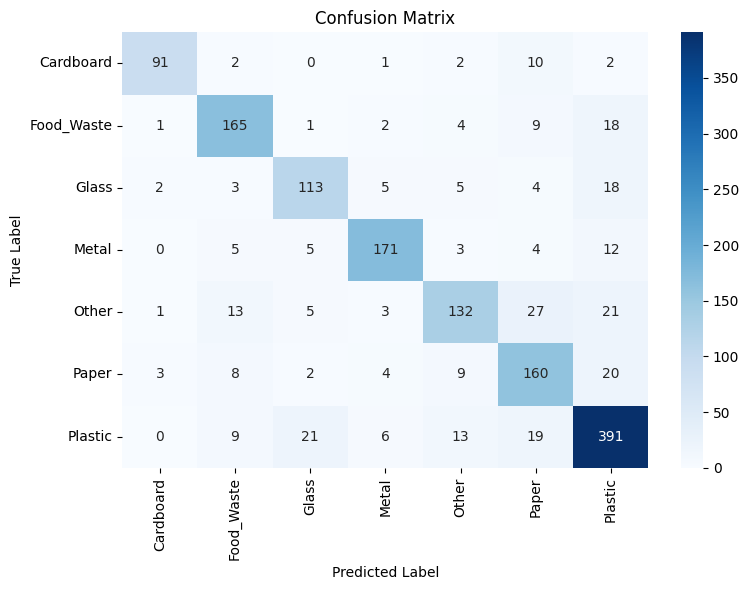

In [63]:

cm = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [64]:
# Define augmentation steps to augment images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [65]:
# Create a function to augment the images


from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_augmentor():
    return ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

In [66]:
# Create the augmented training dataset

augmentor = create_augmentor()

train_generator = augmentor.flow(X_train, y_train, batch_size=32)



In [67]:
# Check one batch
X_aug_sample, y_aug_sample = next(train_generator)
print("Augmented batch shape:", X_aug_sample.shape)


Augmented batch shape: (32, 128, 128, 3)


##### **4.1.2**

Train the model on the new augmented dataset.

In [68]:


checkpoint_cb = ModelCheckpoint("model_augmented_best.h5", monitor='val_accuracy', save_best_only=True)
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_aug = model_resnet.fit(
    train_generator,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_716']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6855 - loss: 1.3951

190/190 ━━━━━━━━━━━━━━━━━━━━ 73s 215ms/step - accuracy: 0.6856 - loss: 1.3948 - val_accuracy: 0.8059 - val_loss: 1.0417
Epoch 2/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.5938 - loss: 1.6561

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5938 - loss: 1.6561 - val_accuracy: 0.8052 - val_loss: 1.0416
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7390 - loss: 1.2159

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.7390 - loss: 1.2160 - val_accuracy: 0.8164 - val_loss: 1.0286
Epoch 4/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.6250 - loss: 1.5204

190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6250 - loss: 1.5204 - val_accuracy: 0.8184 - val_loss: 1.0287
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7484 - loss: 1.1786

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.7484 - loss: 1.1785 - val_accuracy: 0.8262 - val_loss: 1.0155
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 1.5976 - val_accuracy: 0.8262 - val_loss: 1.0149
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7817 - loss: 1.1028

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - accuracy: 0.7817 - loss: 1.1028 - val_accuracy: 0.8354 - val_loss: 0.9973
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7500 - loss: 1.0536 - val_accuracy: 0.8341 - val_loss: 0.9967
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.7876 - loss: 1.0730 - val_accuracy: 0.8341 - val_loss: 0.9810
Epoch 10/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 1.1220 - val_accuracy: 0.8341 - val_loss: 0.9810
Epoch 11/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7955 - loss: 1.0273

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.7955 - loss: 1.0273 - val_accuracy: 0.8393 - val_loss: 0.9706
Epoch 12/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 1.1492 - val_accuracy: 0.8393 - val_loss: 0.9696
Epoch 13/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8129 - loss: 1.0051

190/190 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.8129 - loss: 1.0051 - val_accuracy: 0.8433 - val_loss: 0.9712
Epoch 14/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.6973 - val_accuracy: 0.8426 - val_loss: 0.9715
Epoch 15/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8357 - loss: 0.9599

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.8357 - loss: 0.9598 - val_accuracy: 0.8479 - val_loss: 0.9681
Epoch 16/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7500 - loss: 1.1268

190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7500 - loss: 1.1268 - val_accuracy: 0.8485 - val_loss: 0.9681
Epoch 17/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.8438 - loss: 0.9187 - val_accuracy: 0.8485 - val_loss: 0.9647
Epoch 18/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8438 - loss: 0.9870

190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8438 - loss: 0.9870 - val_accuracy: 0.8492 - val_loss: 0.9648
Epoch 19/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8453 - loss: 0.9035 - val_accuracy: 0.8452 - val_loss: 0.9438
Epoch 20/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.9010 - val_accuracy: 0.8472 - val_loss: 0.9439
Epoch 21/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8587 - loss: 0.8711

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.8587 - loss: 0.8711 - val_accuracy: 0.8498 - val_loss: 0.9461
Epoch 22/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8438 - loss: 0.8892

190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8438 - loss: 0.8892 - val_accuracy: 0.8511 - val_loss: 0.9463
Epoch 23/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8707 - loss: 0.8318

190/190 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.8707 - loss: 0.8318 - val_accuracy: 0.8538 - val_loss: 0.9525
Epoch 24/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.6788 - val_accuracy: 0.8538 - val_loss: 0.9526


In [69]:


val_loss, val_accuracy = model_resnet.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8493 - loss: 0.9127
Validation Accuracy: 0.8452
Validation Loss: 0.9438


In [70]:
y_pred_probs = model_resnet.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

   Cardboard       0.97      0.84      0.90       108
  Food_Waste       0.88      0.84      0.86       200
       Glass       0.88      0.74      0.80       150
       Metal       0.91      0.89      0.90       200
       Other       0.80      0.79      0.79       202
       Paper       0.72      0.83      0.77       206
     Plastic       0.85      0.89      0.87       459

    accuracy                           0.85      1525
   macro avg       0.86      0.83      0.84      1525
weighted avg       0.85      0.85      0.85      1525



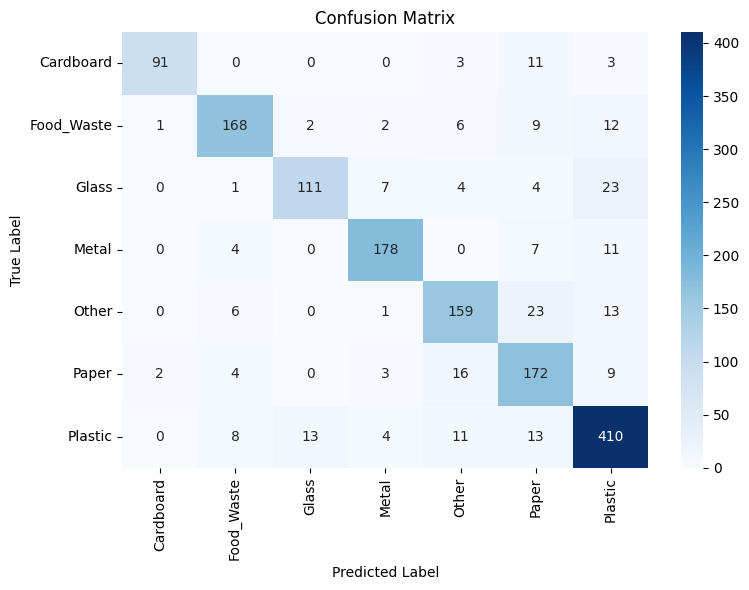

In [71]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

### Findings on Data:

  * All the images were the size of 256×256, so there was no resize needed for the given images. 

  * All the images have 3 channels as RGB.

  * The data has seven categories. Cardboard, Food Waste, Glass, Metal, Other, Paper, Plastic

  * Class distribution was imbalanced. There was a greater number of images in the plastic category. 

  * Since there was no equal number of images present in each category, the test and train split was done with stratify=y with an 80/20 ratio.

  * included the argumentation strategy.

### Model Training Report:

  * Initially tried with own CNN network with 3 convolutional layers, but the accuracy was just 0.40, which was very low. I tried configuring hyperparameters like dropouts, and the performance increased to 0.50. 

  * So I opted for the transfer learning approach. I took RESNet 50 and initially made all the layers trainable as false. In that case, also, I was just getting only 0.60 training accuracy, a slight increase from my own CNN network 

  * Next I changed the trainable layers to 20; in this I got the training accuracy as 98 percent and the validation accuracy as 60%. Clearly the model was overfitting. To solve the problem of overfitting, I modified the trainable layers from 20 to 10, and still I was able to see the model was overfitting. 

  * I changed the model training layer to 5 and increased the dropout from 0.6 to 0.7 and modified the learning rate. After this modification, the outputs are derived with accuracy: 0.8544, loss: 0.8852, and val_accuracy: 0.8019. Clearly, the model was able to generalize the training data and produce the desired output.

  * From the confusion matrix we are able to see a lot of misclassification is done as a plastic when compared to others, which is very little.

  * After the augmentation, we are able to see the validation accuracy increase: 0.8493, validation accuracy: 0.8452.

  * Data augmentation played a key role in overfitting of the data. 

  * Overall, the model was able to generalize the data and produce the acceptable prediction; nearly 85% of the data is properly classified.

### summary 

   * The model has performed well on the waste segregation task, achieving overall 84% accuracy with strong generalization.

  